# Introduction to Photometry 
In this example, I will go over how to extract a photometric time series from the Full Frame Images from TESS.

## First, what is the  TESS mission and how does it work?

Open the image below in a new tab for Video Introduction:
[![Youtube Video: ](https://img.youtube.com/vi/Q4KjvPIbgMI/0.jpg)](https://www.youtube.com/watch?v=Q4KjvPIbgMI)

In [1]:
#or run this from your machine
# from IPython.display import Audio,Image, YouTubeVideo
# youtubeid='Q4KjvPIbgMI'
# YouTubeVideo(id=youtubeid,width=800,height=400)

As of today (May 29th, 2019), TESS is observing Sector 12 out of the 13 southern hemisphere sectors. For sectors 14-26, TESS will be begin observing the Northern hemisphere. There are tens of thousands of stars in each sector so there is plenty of work to do!

Below are some very useful sites to bookmark for the future:

## TESS Data Alerts (may need to register to use):
[https://archive.stsci.edu/prepds/tess-data-alerts/](https://archive.stsci.edu/prepds/tess-data-alerts/)
From MIT's Quick Look Pipeline (QLP, publication in preparation), special target stars in TESS are flagged for having interesting transit-like events or confirm previous discoveries or detections of known exoplanets. For most interesting flagged targets, there are two PDF reports: Data Validation Summary (dvs) and Data Validation Report (dvr). The dvs files are one page summary reports that show the light curves and detected transit-like events.

Here is an example of an Ultra Short Period (USP) Super Earth-sized planet orbiting an M dwarf star:
[https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00316937670-s01s02-01_tess_v1_dvs.pdf](https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00316937670-s01s02-01_tess_v1_dvs.pdf)

## MAST
[https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html)
A very useful resource for searching stars that may be available in other astronomy surveys (like GAIA, 2MASS, Hipparcos, Tycho, etc).

## SIMBAD
[http://simbad.u-strasbg.fr/simbad/](http://simbad.u-strasbg.fr/simbad/)
Much like MAST, SIMBAD is another search engine that is very useful in astronomy. You can also get a list of publications for a target from here to see previous work by others.

## Web TESS viewing Tool
[https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py](https://heasarc.gsfc.nasa.gov/cgi-bin/tess/webtess/wtv.py)
This is useful for checking when a target will or will not be observed by TESS

## High precision TESS Light Curves Filtergraph
[https://filtergraph.com/tess_ffi/](https://filtergraph.com/tess_ffi/)
Ryan Oelkers and Keivan Stassun have provided incredibly useful already processed light curves available for download. I will show you how to extract light curves with "Simple Aperture Photometry" but these light curves have a much better methodology and we will be using this data extensively. [Read more about their work here.](https://arxiv.org/pdf/1803.02316.pdf)

In the next section, I will show you how to use the Filtergraph website.

## How to get data from TESS?

TESS uploads its data to the MAST catalogs. When you installed Astropy, a python module called Astroquery was also installed. So let's begin by importing the following.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *
import matplotlib.gridspec as gridspec

import astropy
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits

There are two main data products we are interested in. 

1) The Full Frame Images (FFI): These are images taken every 30 minutes of a sector. 
    
2) Target Pixel Files (TPF): These are images taken every 2 minutes of a sector. 
    
You can read more about these two and other data products here:
[https://heasarc.gsfc.nasa.gov/docs/tess/data-access.html](https://heasarc.gsfc.nasa.gov/docs/tess/data-access.html)

In case TPFs are available, let's also import this package from the Lightkurve module. 

Also, let's import the catalog_info package from the transitleastsquares module to quickly and easily query the MAST server for information on our target stars.

In [1]:
from lightkurve import search_targetpixelfile
from transitleastsquares import catalog_info

Let's start with the USP Super Earth orbiting the M dwarf star which has the Tess Input Catalog (TIC) ID:  316937670 

In [2]:
ID = 121202851 #316937670 

print("TIC ID: ",ID)
qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(TIC_ID=ID)
# qld, R_star, R_star_min, R_star_max, M_star, M_star_min, M_star_max = catalog_info(EPIC_ID=211611158)
print('Quadratic limb darkening q1, q2: ', qld[0], qld[1])
print('Stellar radius: ', R_star, '+', R_star_max, '-', R_star_min, 'solar radii')
print('Stellar mass: ', M_star, '+', M_star_max, '-', M_star_min,'solar mass')
print(" ")


TIC ID:  121202851


KeyboardInterrupt: 

## Work in progress (come back later)
Let's see if there are TPFs for this target

In [ ]:

# tpfs = search_targetpixelfile(ID,mission="TESS",radius=1)

# tpf_time =[]; tpf_flux=[]; tpf_fluxerror=[]

# if (len(tpfs))>0:
#     print ("number of available tpfs: ", len (tpfs))
#     tpf=tpfs.download_all()
    
#     if len(tpf)>1:
#         for x in range(len(tpf)):
#             tpf_time.append(tpf[x].time)
#             tpf_flux.append(tpf[x].flux)
#             tpf_fluxerror.append(tpf[x].flux_err)
            
        
    
#     else:
#         # Create a median image of the source over time
#         median_image = np.nanmedian(tpf.flux, axis=0)

#         # Select pixels which are brighter than the 95th percentile of the median image
#         aperture_mask = median_image > np.nanpercentile(median_image, 95)

#     #     tpf.plot(aperture_mask=tpf.pipeline_mask);
#         tpf.plot(aperture_mask=aperture_mask);
#         plt.show()

#         lc = tpf.to_lightcurve()
#         plt.plot(lc.time,lc.flux,c='grey',marker='.',linestyle='none')
#         plt.xlabel("Time")
#         plt.ylabel('Flux')
#         plt.title("TIC "+str(ID))
#         plt.show()

        

#         det_lc = lc.flatten(window_length=201).remove_outliers(sigma=6)
#         plt.plot(det_lc.time,det_lc.flux,'k.')
#         plt.xlabel("Time")
#         plt.ylabel('Flux')
#         plt.title("TIC "+str(ID))
#         plt.show()


    
# else:
#     print(" no tpfs available")
#     print(" ")
#     print("try from tesscut")
    
    


# Let's get the FFI data

In [ ]:
starName = "TIC " + str(ID)

## First, we need to define an angular radius to search around the coordinates of our selected target

In [ ]:
radSearch = 0.5 / 60 # angular radius in degrees

catalogData = Catalogs.query_object(starName, radius = radSearch, catalog = "TIC")

Now, let's see what our Right Ascension (RA) and Declination (Dec) are for this target as well as other information.

In [ ]:
ra = catalogData[0]['ra']; dec = catalogData[0]['dec']

# Print out the first row in the table
print( catalogData[:5]['ID', 'Tmag', 'Vmag', 'ra', 'dec', 'objType'] )

Because M dwarfs are faint stars, we need to be sure there are no bright stars nearby that could contaminate our data

In [ ]:
#Lets make a brightness cut to remove anything brighter than 17 TESS Magnitude (Tmag).

bright = catalogData['Tmag'] < 17 #TESS magnitude

# Make it a list of Ra, Dec pairs of the bright ones. This is now a list of nearby bright stars.
nearbyStars = list( map( lambda x,y:[x,y], catalogData[bright]['ra'], catalogData[bright]['dec'] ) )
print(nearbyStars)


Lets now use the coordinates to get a sector tables for our target

In [ ]:
coord = SkyCoord(ra, dec, unit = "deg")
sectorTable = Tesscut.get_sectors(coord)
print(sectorTable)


Now that we know this target was observed by TESS, let's get the FFI and look at the data structure

In [ ]:
cutoutsize=5 #pixels. Feel free to make this number larger and toy around.

hdulist = Tesscut.get_cutouts(coord)#, cutoutsize) #number is pixel cutout?
for ii in range(len(hdulist)):
    print(hdulist[ii]) #if blank, does that mean no cutout is available yet?
    print(" ")


hdulist[0].info()
print(" ")


Here is a definition I like to use to plot what our cut out FFI data looks like:

In [ ]:
def plot_cutout_ax(image,ax):
    """
    Plot image and add grid lines.
    """
    ax.imshow(image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
           vmax = np.percentile(image, 92),
           vmin = np.percentile(image, 5))

    ax.grid(axis = 'both',color = 'white', ls = 'solid')

In [ ]:
fs=10 #fontsize

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('TIC_'+str(ID)+'_FFIs.pdf') as pdf: #this is a way to save PDF files of your figures
    for ii in range(len(sectorTable)):
        print (ii)

        hdu = hdulist[ii]
        
        Image = hdu[1].data['FLUX'][0] 
        wcs = WCS(hdu[2].header)
        
        pltind = 221
        
        fig = plt.figure(figsize=(12, 8))
        
        fig.add_subplot(pltind).imshow(Image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
               vmax = np.percentile(Image, 92),
               vmin = np.percentile(Image, 5))
        plt.ylabel('Image Row',fontsize = fs) 
        plt.xlabel('Image Column',fontsize = fs)
        plt.title("Sector "+str(hdulist[ii][0].header['SECTOR']),fontsize = fs)

        
        fig.add_subplot(pltind+1,projection = wcs).imshow(Image, origin = 'lower', cmap = plt.cm.YlGnBu_r, 
               vmax = np.percentile(Image, 92),
               vmin = np.percentile(Image, 5))

        plt.title("Sector "+str(hdulist[ii][0].header['SECTOR']),fontsize = fs)
        plt.xlabel('RA', fontsize = 12)
        plt.ylabel('Dec', fontsize = 12)

        fig.suptitle('TIC '+str(ID)+' FFIs')
        fig.subplots_adjust(wspace=0.1)#,hspace=0.02)
#         fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    pdf.savefig(bbox_inches='tight')
    plt.show()

Here are a couple more functions I like to use to extract light curves from these FFI cutouts with Simple Aperture Photometry

In [ ]:
def aperture_phot(image, aperture):
    """
    Sum-up the pixels that are in the aperture for one image.
    image and aperture are 2D arrays that need to be the same size.
    
    aperture is a boolean array where True means to include the light of those pixels.
    """
    flux = np.sum(image[aperture])

    return flux

def make_lc(flux_data, aperture):
    """
    Apply the 2d aperture array to the and time series of 2D images. 
    Return the photometric series by summing over the pixels that are in the aperture.
    
    Aperture is a boolean array where True means it is in the desired aperture.
    """
    
    flux = np.array(list (map (lambda x: aperture_phot(x, aperture), flux_data) ) )
    error = np.array(list (map (lambda x: aperture_phot(x, aperture), flux_data) ) )
    return flux,error

## NOTE:
It is at this step that Ryan Oelker's work begins to differ and do a better job at extracting light curves from these FFI files.

In [ ]:
print ("may want to use custom aperture:")
aperture = hdu[2].data

print(" ")
print("cut out pixel values:")
print(aperture)

print("Here we are using every pixel in the cutout data")

## Simple Aperture Photometry Procedure:
With the use of every pixel, we then count how many photons hit each pixel of the CCD of the cameras on TESS. 

We then check the dimmest pixels to estimate what the background brightness is and then subtract it from the brightness of our target.

Finally, we then Normalize the brightness of our data by dividing it by its average so that its baseline is center on 1.0. 

In [ ]:
rawt=[];rawf=[];rawe=[]
bkgt=[];bkgf=[];bkge=[]
T=[];F=[];E=[]

for ii in range(len(hdulist)): #number of sector data
    hdu = hdulist[ii]
    aperture = hdu[2].data == 1  #just for this case because cutout is so zoomed in

    #extract raw light curve
    f = make_lc(hdu[1].data['FLUX'], aperture)[0]
    e = make_lc(hdu[1].data['FLUX_ERR'], aperture)[0]
    t = hdu[1].data['TIME'] 
    
    t = t[~np.isnan(t)] # ~np.isnan() removes NaN (not a number) values from array. Sometimes weird things happen that cause this (telescope errors, known problems,etc).
    f = f[~np.isnan(f)]
    e = e[~np.isnan(e)]

    #estimate background flux by checking dimmest pixels by using percentile.
    bkgAperture = hdu[1].data['FLUX'][0] < np.percentile(hdu[1].data['FLUX'][0], 5)
    
    bkgFlux = make_lc(hdu[1].data['FLUX'], bkgAperture)[0]
    bkgSubFlux = f - (bkgFlux * np.sum(aperture) / np.sum(bkgAperture) ) #subtracting background flux
    bkgSubFlux = bkgSubFlux[~np.isnan(bkgSubFlux)]

    #Normalize background subtracted flux
    NormFlux = bkgSubFlux/np.mean(bkgSubFlux)
    NormFlux = NormFlux[~np.isnan(NormFlux)]
    
    rawt=np.append(rawt,t)
    rawf=np.append(rawf,f)
    rawe=np.append(rawe,e)
    
    #Background flux data
    bkgFlux = bkgFlux[~np.isnan(bkgFlux)] 

    bkgt = np.append(bkgt,t)
    bkgf = np.append(bkgf,bkgFlux)
    bkge = np.append(bkge,e)
    

    #background subtracted and normalized data
    NormFlux = NormFlux[~np.isnan(NormFlux)]
    t = t[~np.isnan(NormFlux)]
    e = e[~np.isnan(NormFlux)]

    T = np.append(T,t)
    F = np.append(F,NormFlux)
    E = np.append(E,e)



plt.figure(figsize = (11,5))
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(311)
plt.plot(rawt,rawf, color='grey',marker='.',linestyle='none', lw = .5)
plt.xlabel('TIME (BJD)')
plt.ylabel('Flux (e-/s)')
plt.title('Flux in Photometric Aperture (Sector 1 and 2)')

fig.add_subplot(312)
plt.plot(bkgt, bkgf, 'r.', lw = .5)
plt.xlabel('TIME (BJD)')
plt.ylabel('Estimate of Background')
plt.title('Background Flux')

fig.add_subplot(313)
plt.plot(T, F,'.k', lw = 0.5)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Normalized Flux (e-/s)')
plt.title('Background Subtracted Flux')

fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()



This is pretty messy. Let's see if we can clean this up a bit more. Let's start by doing a 3 sigma cut where we remove outliers that are above or below the mean +/- 3xstd of our Flux.

In [ ]:
print("remove some outliers ")

threshold1 = np.mean(F)+1.0*np.std(F)
threshold2 = np.mean(F)-1.0*np.std(F)

cutTime = T[np.where( (F<threshold1) & (F>threshold2)  )[0]]
cutFlux = F[np.where( (F<threshold1) & (F>threshold2)  )[0]]#/np.mean(NormFlux[np.where( (NormFlux<threshold1) & (NormFlux>threshold2)  )[0]])
cutFluxError = E[np.where( (F<threshold1) & (F>threshold2)  )[0]]


plt.figure(figsize = (11,5))
plt.plot(cutTime, cutFlux,'.k', lw = 0.5)

# plt.xlim(1325, 1336)
plt.xlabel('TIME (BTJD)')
plt.ylabel('Normalized Flux (e-/s)')
plt.title('Background Subtracted Flux')
plt.show()

x=cutTime; y=cutFlux; yerr = cutFluxError


Much better! I think we can do better to remove some of the wiggles seen in this light curve.

We can do this by using a Savitsky-Golay filter:

If given a window size, you can slide this window through the data and perform a cubic interpolation between data points to estimate the general shape of the data. You can read more about this here:
[https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)

We can then subtract this model from our data to get a flat light curve. 

To decide on how big to make this sliding window, we need to figure out the cadence (sample rate) of our data.

In [ ]:
cad =  hdu[1].header['FRAMETIM'] *hdu[1].header["NUM_FRM"]; 
cad/= 60.0 * 60.0 * 24.0 # in days
print("cadence: ")
print(cad," days; in hours: ",cad*24.0)

print("")
print( "timesteps between two sets of data points (days:")
print(T[-1]-T[-2]," days; in hours: ",(T[-1]-T[-2])*24.0)

This cadence makes sense. FFIs are taken evry 30 minutes which this supports.

In [ ]:

from scipy.signal import savgol_filter

newflux = y

# Identify extra outliers that survived our initial cut
print(" ")
window_size = int(5.0/cad) #number of data points in 5 hour window
if (window_size % 2) == 0: #must be odd
    window_size = window_size+1
print("number of data points in ",5," hours: ",window_size)

#smoothing with Savitsky-Golay filter, doing so ten times

o = np.ones(len(newflux), dtype=bool)
for i in range(10):
    y_prime = np.interp(x, x[o], newflux[o])
    smooth = savgol_filter(y_prime, window_size, polyorder=3)
    resid = newflux - smooth
    sigma = np.sqrt(np.mean(resid**2))
    o0 = np.abs(resid) < 3*sigma
    if o.sum() == o0.sum():
        o = o0
        break
    o = o0

# Only discard positive outliers
o = resid < 3.0*sigma

# Shift the data so that the data starts at t=0.  (Optional. See later tutorial pages)
# x_ref = np.min(x[o])
# x -= x_ref

# Plot the data
plt.plot(x, newflux, "k.", label="data")
plt.plot(x, smooth)
plt.plot(x[~o], newflux[~o], "xr", label="outliers")
plt.legend(fontsize=12)
# plt.xlim(x.min(), x.max())
plt.xlabel("shifted time (start at 0)")
plt.ylabel("flux")
plt.show()

# Make sure that the data type is consistent
xx = np.ascontiguousarray(x[o], dtype=np.float64)
newflux = np.ascontiguousarray(newflux[o], dtype=np.float64)
smooth = np.ascontiguousarray(smooth[o], dtype=np.float64)
newfluxerror = np.ascontiguousarray(cutFluxError[o], dtype=np.float64)

plt.plot(xx, newflux - smooth,'k.',label='flux-smoothed')
plt.legend(fontsize=12)
# plt.xlim(x.min(), x.max())
plt.xlabel("shifted time (start at 0)")
plt.ylabel("flux")
plt.show()


# And that's how you do basic photometry and data clean up!

# Back up in case MAST queries are not working (TIC v8 updating?)

Load in data sets downloaded from Filtergraph. Same target as in cell above ^^^
Make sure to download 'TIC_316937670_lightcurve.txt' from GitHub Photometry folder


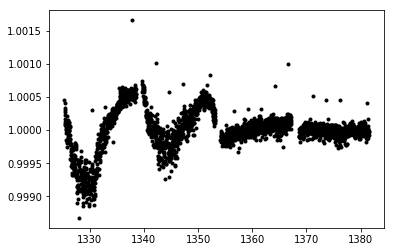

In [39]:
#Back up in case MAST queries are not working (TIC v8 updating?)

print ("Load in data sets downloaded from Filtergraph. Same target as in cell above ^^^")
print( "Make sure to download 'TIC_316937670_lightcurve.txt' from GitHub Photometry folder")

#load in data.
ID='316937670'

data = np.loadtxt('TIC_'+ID+'_lightcurve.txt')
t = np.transpose(data)[0]
f = np.transpose(data)[1]/np.mean(np.transpose(data)[1])
fe = np.transpose(data)[2]

plt.plot(t,f,'k.')
plt.show()


0.015601840555555541
 
number of data points in  5  hours:  321


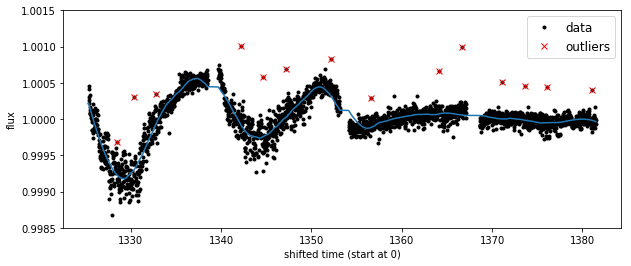

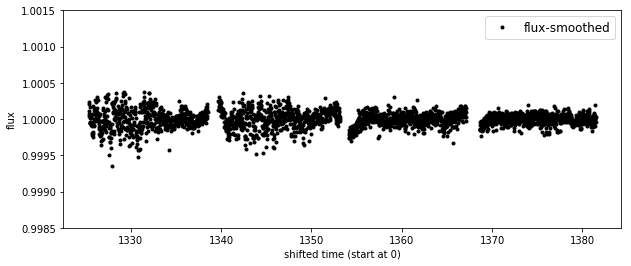

In [40]:
from scipy.signal import savgol_filter

newflux = f
x = t

cad = x[-1]-x[0]
cad/= 60.0 * 60.0  # in days
print(cad)


# Identify extra outliers that survived our initial cut
print(" ")
window_size = int(5.0/cad) #number of data points in 5 hour window
if (window_size % 2) == 0: #must be odd
    window_size = window_size+1
print("number of data points in ",5," hours: ",window_size)

#smoothing with Savitsky-Golay filter, doing so ten times

o = np.ones(len(newflux), dtype=bool)
# for i in range(10):
for i in range(100):
    y_prime = np.interp(x, x[o], newflux[o])
    smooth = savgol_filter(y_prime, window_size, polyorder=3)
    resid = newflux - smooth
    sigma = np.sqrt(np.mean(resid**2))
    o0 = np.abs(resid) < 3*sigma
    if o.sum() == o0.sum():
        o = o0
        break
    o = o0

# Only discard positive outliers
o = resid < 3.0*sigma

# Shift the data so that the data starts at t=0.  (Optional. See later tutorial pages)
# x_ref = np.min(x[o])
# x -= x_ref

# Plot the data
plt.figure(figsize=(10,4))
plt.plot(x, newflux, "k.", label="data")
plt.plot(x, smooth)
plt.plot(x[~o], newflux[~o], "xr", label="outliers")
plt.legend(fontsize=12)
# plt.xlim(x.min(), x.max())
plt.xlabel("shifted time (start at 0)")
plt.ylabel("flux")
plt.ylim(0.9985,1.0015)
plt.show()

# Make sure that the data type is consistent
xx = np.ascontiguousarray(x[o], dtype=np.float64)
newflux = np.ascontiguousarray(newflux[o], dtype=np.float64)
smooth = np.ascontiguousarray(smooth[o], dtype=np.float64)
newfluxerror = np.ascontiguousarray(fe[o], dtype=np.float64)

plt.figure(figsize=(10,4))
plt.plot(xx, newflux - smooth+1,'k.',label='flux-smoothed')
plt.legend(fontsize=12)
# plt.xlim(x.min(), x.max())
plt.xlabel("shifted time (start at 0)")
plt.ylabel("flux")
plt.ylim(0.9985,1.0015)
plt.show()

#save data to text file
np.savetxt('TIC_'+ID+'_lightcurve_cleaned.txt',list(zip(xx,newflux - smooth+1,newfluxerror)))
